In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Thu Apr 16 08:04:39 2020


In [2]:
# read a data file, store all data in arrays

#file = "/home/imaginglab/Data/TPX3/CHIP0/Test/hiQEred_EntangledSource_10s_W0028_H11-191025-151713-1_cent.csv"
#file = "/home/andrei/Data/TPX3/CHIP0/Test/FirstIonTelegraf_100s_W0028_H11-200210-193057-1_cent.csv"
#file = "/Users/andreinomerotski/Documents/Andrei/python/UWash/ion_trigger100kHz_100s_W0028_H11-200211-145816-1_cent-2.csv"
# new centroiding
file = "/Users/andreinomerotski/Documents/Andrei/python/UWash/fourions_trigger100kHz_300s_W0028_H11-200211-192509-1_cent.csv"
#file = "/home/andrei/Data/TPX3/CHIP0/Test/ionszigzag_trigger100kHz_100s_W0028_H11-200211-190842-1_cent.csv"
#file = "/home/andrei/Data/TPX3/CHIP0/Test/fourions_diffcomp044_trigger100kHz_600s_W0028_H11-200211-201437-1_cent.csv"

print (file, time.ctime())

#data=np.loadtxt(file, dtype= int, delimiter=",", usecols = (0,1,2,3))
#data=np.loadtxt(file, dtype= int, delimiter=",", usecols = (0,1,2,3,4))
data=np.loadtxt(file, dtype= float, delimiter=",", usecols = (0,1,2,3,4,5,6,7,8,9,10,11))
#data=np.loadtxt(file, dtype= int, delimiter=",", usecols = (0,1,2,3,4,5,6,7))
#data=np.loadtxt(file, dtype= int, skiprows = 2, delimiter=",", usecols = (0,1,2,3,4,5,6))

#print data
tid = data[:, 0]
tt  = data[:, 1]
y   = data[:, 2]
x   = data[:, 3]
t   = data[:, 4]
a   = data[:, 5]
A   = data[:, 6]
tof = data[:, 7]
n   = data[:, 8]
yc  = data[:, 9]
xc  = data[:, 10]
tof_corr = data[:, 11]*1000

#fileCorrection = "/Users/andreinomerotski/Documents/Andrei/python/UWash/TOTcorrection.csv"
fileCorrection = "/Users/andreinomerotski/Documents/Andrei/python/UWash/fourions_trigger100kHz_300s_W0028_H11-200211-192509-1_LTcorr.csv"
correction = np.loadtxt(fileCorrection, unpack=True, delimiter=",")
TOT_i  = [int(tot/25) for tot in a]
t_corr = t/4096*25 + correction[1][TOT_i]*1000
#tof_corr = tof/4096*25 + correction[1][TOT_i]*1000

for i in range(0,20):
    print (i, x[i],y[i],xc[i],yc[i],t[i],t_corr[i],a[i],A[i],n[i], tid[i], tt[i], tof[i]/4096*25, tof_corr[i])
    
print (len(t), time.ctime())

/Users/andreinomerotski/Documents/Andrei/python/UWash/fourions_trigger100kHz_300s_W0028_H11-200211-192509-1_cent.csv Thu Apr 16 08:05:36 2020
0 41.0 21.0 41.138889 21.152778 223214660352.0 1362394154.4565 600.0 1800.0 5.0 3339.0 223214445269.0 1312.762451171875 1300.031
1 118.0 103.0 118.615 103.405 223225393408.0 1362459676.5625 4450.0 10000.0 9.0 3345.0 223224409344.0 6006.25 6006.25
2 121.0 104.0 121.265376 104.536446 223241841664.0 1362560068.75 4425.0 10975.0 10.0 3355.0 223241016277.0 5037.762451171875 5037.762
3 244.0 174.0 244.320833 174.841667 223266771200.0 1362712224.7325 2450.0 6000.0 6.0 3370.0 223265926698.0 5154.43115234375 5152.601
4 119.0 101.0 119.096154 101.282051 223300164608.0 1362916041.139 1675.0 3900.0 5.0 3390.0 223299140437.0 6251.043701171875 6248.432
5 58.0 104.0 58.801887 104.166667 223326432768.0 1363076369.577 1875.0 3975.0 4.0 3406.0 223325711488.0 4402.34375 4400.045
6 94.0 104.0 94.49 104.73 223337742080.0 1363145395.4415 1500.0 2500.0 4.0 3413.0 22333

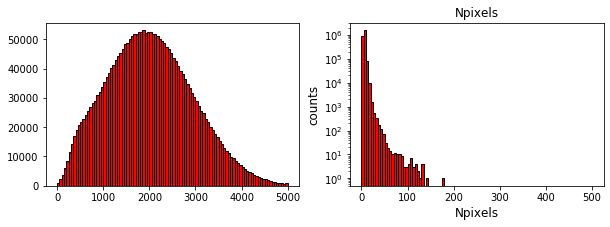

average pixels/hit = 5.6457440867842 <TOT> =  2008.63787016902
Thu Apr 16 08:06:13 2020


In [3]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(a, bins = 100, range = (0, 5000), color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
#plt.xlim(0, 240)
plt.yscale('log')
#plt.ylim(0, 10000)
#plt.show()

ax1.hist(n, bins = 100, range = (0, 500), color = 'r', ec = 'k')
plt.title("Npixels", fontsize = 12) # change the title
plt.xlabel('Npixels',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
#plt.ylim(0.1, 1E5)
#plt.yscale('log')
#plt.ylim(0, 10000)
plt.show()

print ('average pixels/hit =', np.average(n), '<TOT> = ', np.average(a))
print (time.ctime())


(0, 256)

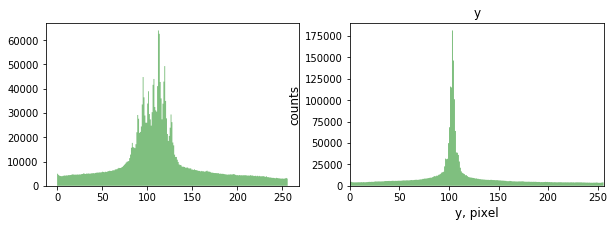

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 3))

ax0.hist(xc, bins = 256, range = (0, 256), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("x", fontsize = 12) # change the title
plt.xlabel('x, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)

ax1.hist(yc, bins = 256, range = (0, 256), color = 'g', alpha=0.5, histtype = 'stepfilled')
plt.title("y", fontsize = 12) # change the title
plt.xlabel('y, pixel',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xlim(0, 256)

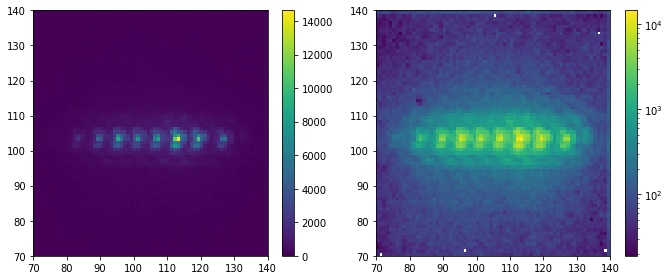

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x, y, bins = 70, range = [(70, 140), (70, 140)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x, y, bins = 70, range = [(70, 140), (70, 140)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


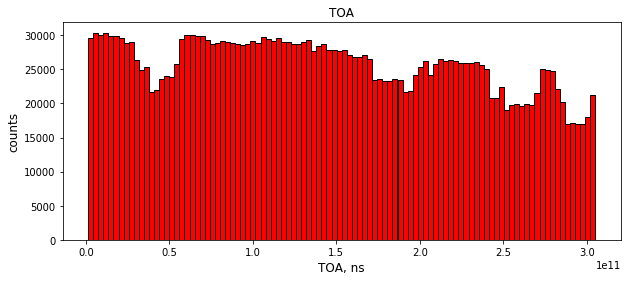

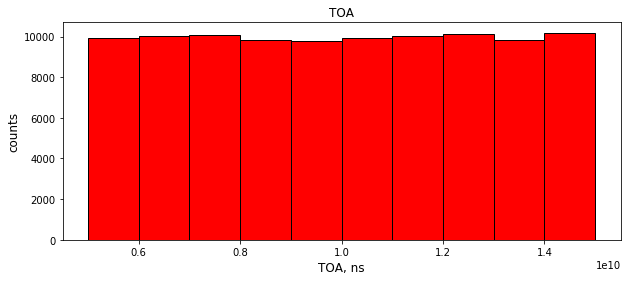

In [10]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 400, range = (5E+9, 6E+9), color = 'r', ec = 'k')
plt.hist(t/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t/4096.*25., bins = 10, range = (0.5E+10, 1.5E+10), color = 'r', ec = 'k')
#plt.hist(t/4096.*25., bins = 20, range = (-1.E+10, 1.E+10), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()


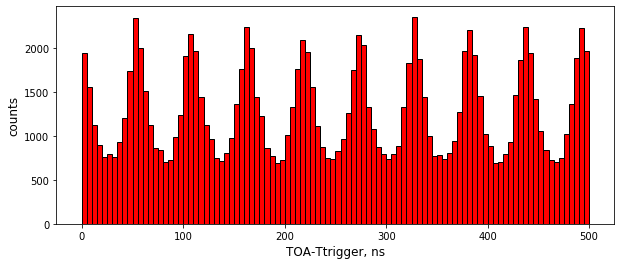

In [11]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(tof/4096.*25., bins = 100, range = (0, 500), color = 'r', ec = 'k')
plt.xlabel('TOA-Ttrigger, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()


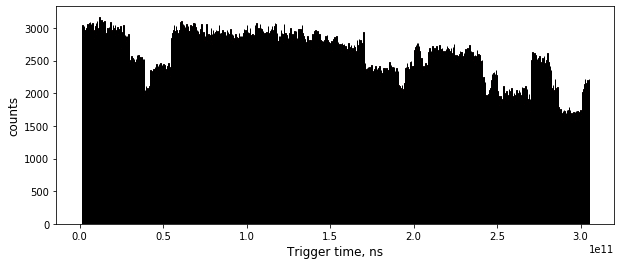

In [12]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(tt/4096.*25., bins = 1000, color = 'r', ec = 'k')
plt.xlabel('Trigger time, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()


In [19]:
# select data

x1 = []; y1 = []; t1 = []; a1 = []; n1 = []; tof1 = []; tof_corr1 = []; tfold1 =[]

px1min = 97;  px1max = 107; py1min = 100; py1max = 110
px1 = 102;  py1 = 104; pr1min = 0.; pr1max = 4; tmin = 0.01e11; tmax = 3.00e11; tperiod = 54.79


for i in range(len(x)-1):
    pr1 = np.sqrt((xc[i]-px1)*(xc[i]-px1)+(yc[i]-py1)*(yc[i]-py1))
#    print(pr1)
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())

#    if ( px1min < xc[i] < px1max and py1min < yc[i] < py1max and tmin < t[i]/4096.*25. < tmax): 
    if ( pr1min < pr1 < pr1max and tmin < t[i]/4096.*25. < tmax and 2 < n[i]): 
        x1.append(xc[i])
        y1.append(yc[i])
        t1.append(t[i]/4096.*25.)
        tof1.append(tof[i]/4096.*25.)
        a1.append(a[i])
        n1.append(n[i])
        tof_corr1.append(tof_corr[i])
        tfold1.append(tof_corr[i]%tperiod)

x2 = []; y2 = []; t2 = []; a2 = []; n2 = []; tof2 = []; tof_corr2 = []; tfold2 =[]

# 20191017
px2min = 114;  px2max = 124; py2min = 100; py2max = 110; 
px2 = 119;  py2 = 104; pr2min = 0.; pr2max = 4

for i in range(len(x)-1):
    pr2 = np.sqrt((xc[i]-px2)*(xc[i]-px2)+(yc[i]-py2)*(yc[i]-py2))
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())
#    if ( px2min < xc[i] < px2max and py2min < yc[i] < py2max and tmin < t[i]/4096.*25. < tmax): 
    if ( pr2min < pr2 < pr2max and tmin < t[i]/4096.*25. < tmax and 2 < n[i]): 
        x2.append(xc[i])
        y2.append(yc[i])
        t2.append(t[i]/4096.*25.)
        tof2.append(tof[i]/4096.*25.)
        a2.append(a[i])
        n2.append(n[i])
        tof_corr2.append(tof_corr[i])        
        tfold2.append(tof_corr[i]%tperiod)
        
print (len(x1), len(x2))

for j in range(1,10):
    print (j, x1[j],y1[j],t1[j],a1[j],n1[j],tof1[j], tof_corr1[j])
    print (j, x2[j],y2[j],t2[j],a2[j],n2[j],tof2[j], tof_corr2[j])
    
(time.ctime())

94144 127779
1 101.779412 107.022059 1396187996.875 1275.0 4.0 1536.981201171875 1533.037
1 121.265376 104.536446 1362560068.75 4425.0 10.0 5037.762451171875 5037.762
2 98.760377 104.733962 1399529320.3125 2725.0 7.0 8097.918701171875 8096.356
2 119.096154 101.282051 1362916043.75 1675.0 5.0 6251.043701171875 6248.432
3 100.542553 105.861702 1400430510.9375 1950.0 7.0 7180.21240234375 7177.978
3 116.247573 105.063107 1363615439.0625 1075.0 4.0 6258.074951171875 6252.778
4 98.054404 103.898964 1404444868.75 1650.0 4.0 7660.418701171875 7657.776
4 121.596234 103.186192 1363908017.1875 2925.0 7.0 4891.14990234375 4889.5869999999995
5 101.331715 106.37055 1411540556.25 3675.0 8.0 8109.11865234375 8109.119
5 118.002857 100.831429 1365933901.5625 1450.0 4.0 3564.0625 3560.889
6 101.45873 104.014286 1415160371.875 2650.0 8.0 9353.64990234375 9352.031
6 117.462963 104.974074 1366764057.8125 2600.0 6.0 2564.0625 2562.3269999999998
7 103.18 106.452 1418695903.125 2725.0 7.0 7401.5625 7400.0
7 11

'Thu Apr 16 09:25:01 2020'

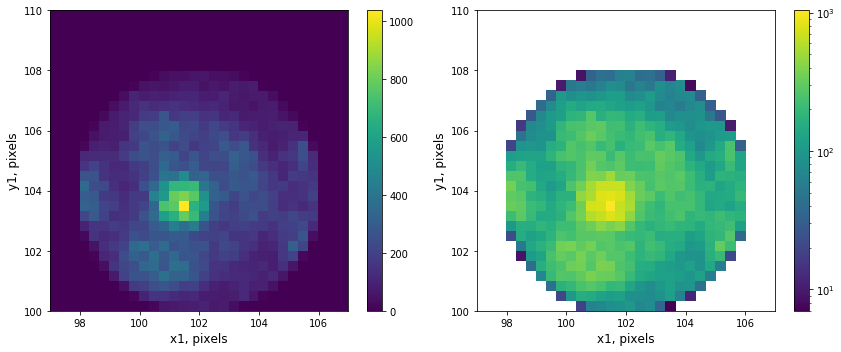

In [20]:
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12, 5))

h1 = ax0.hist2d(x1, y1, bins = (px1max-px1min)*3, range = [(px1min, px1max), (py1min, py1max)])
ax0.set_xlabel('x1, pixels',fontsize = 12)
ax0.set_ylabel('y1, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax0)

h = ax1.hist2d(x1, y1, bins = (px1max-px1min)*3, range = [(px1min, px1max), (py1min, py1max)], norm=mpl.colors.LogNorm())
ax1.set_xlabel('x1, pixels',fontsize = 12)
ax1.set_ylabel('y1, pixels',fontsize = 12)
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()


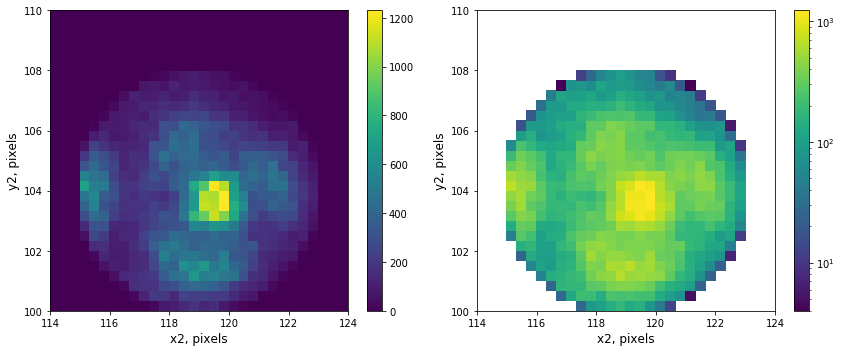

In [21]:
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12, 5))

h1 = ax0.hist2d(x2, y2, bins = (px2max-px2min)*3, range = [(px2min, px2max), (py2min, py2max)])
ax0.set_xlabel('x2, pixels',fontsize = 12)
ax0.set_ylabel('y2, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax0)

h = ax1.hist2d(x2, y2, bins = (px2max-px2min)*3, range = [(px2min, px2max), (py2min, py2max)], norm=mpl.colors.LogNorm())
ax1.set_xlabel('x2, pixels',fontsize = 12)
ax1.set_ylabel('y2, pixels',fontsize = 12)
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()


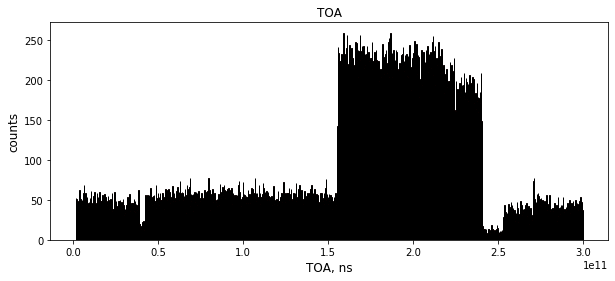

In [22]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t1, bins = 1000, color = 'r', ec = 'k')
#plt.hist(t1, bins = 1000, range = (50e9, 51e9), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

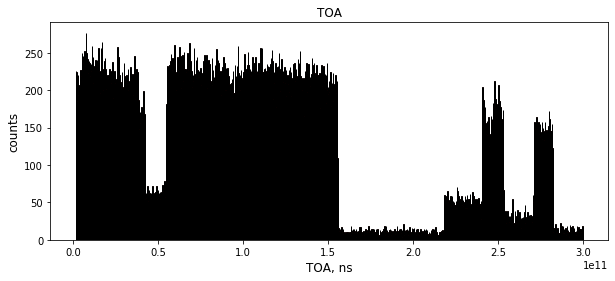

In [24]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t2, bins = 1000, color = 'r', ec = 'k')
#plt.hist(t1, bins = 1000, range = (50e9, 51e9), color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

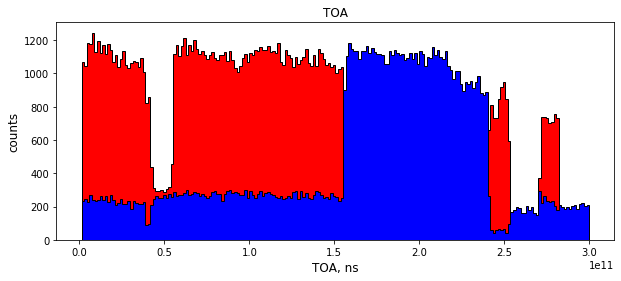

In [23]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(t2, bins = 200, color = 'r', ec = 'k', histtype = 'stepfilled')
plt.hist(t1, bins = 200, color = 'b', ec = 'k', histtype = 'stepfilled')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

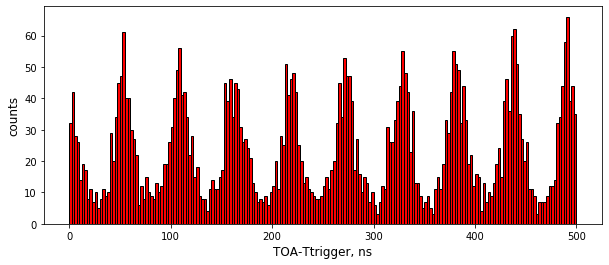

In [25]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(tof1, bins = 200, range = (0, 500), color = 'r', ec = 'k')
plt.xlabel('TOA-Ttrigger, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

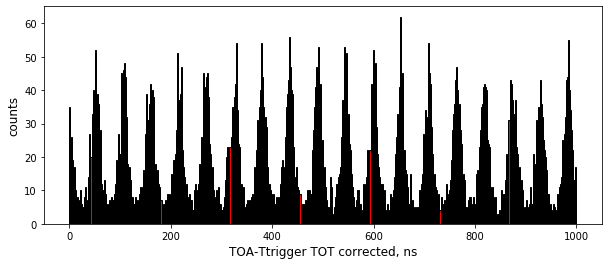

In [26]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(tof_corr1, bins = 500, range = (0, 1000), color = 'r', ec = 'k')
plt.xlabel('TOA-Ttrigger TOT corrected, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

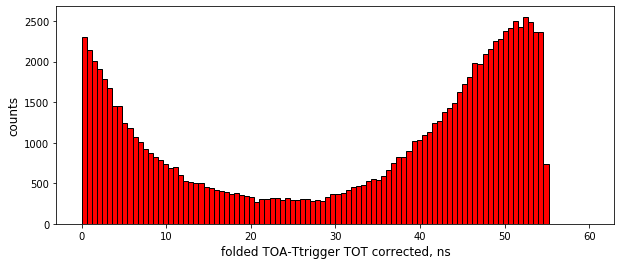

In [27]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))

plt.hist(tfold1, bins = 100, range = (0, 60), color = 'r', ec = 'k')
plt.xlabel('folded TOA-Ttrigger TOT corrected, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

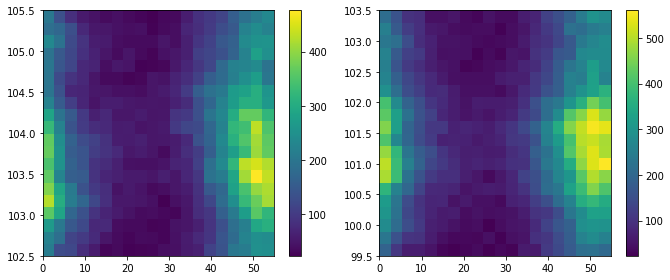

In [30]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(tfold1, y1, bins = 20, range = [(0, 55), (102.5, 105.5)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(tfold1, x1, bins = 20, range = [(0, 55), (99.5, 103.5)])
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

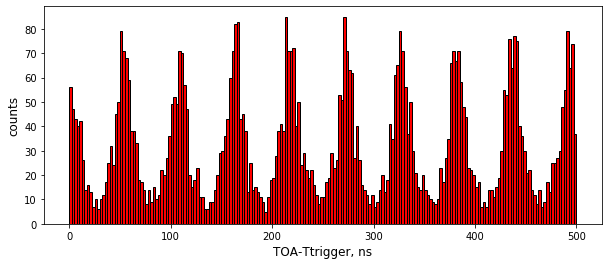

In [31]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(tof2, bins = 200, range = (0, 500), color = 'r', ec = 'k')
plt.xlabel('TOA-Ttrigger, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

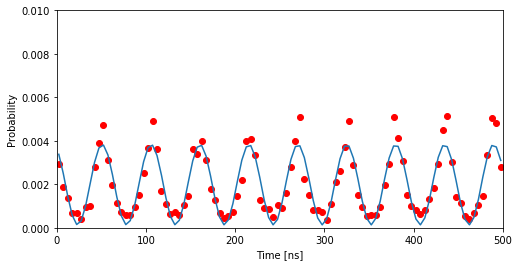

A      =  0.00198 +- 0.00006
B      = 0.00185 +- 0.00008
period = 54.7987  +- 0.1399 ns
shift  = -17.4197  +- 0.7685 ns
frequency = 18.2486 MHz


In [44]:
from scipy.optimize import curve_fit

def Oscillation(x, A, B, period, phase):
    y = A + np.abs(B) *np.sin(2*np.pi*(x-phase)/period)
    return y

xmin  = 0.
xmax  = 500.
nbins = 100
#normalization = ((xmax-xmin)/nbins*len(deltaTc))
normalization = (xmax-xmin)/nbins
A = 0.02
B = 0.02
period = 54.
phase = 0.

#hist, bin_edges = np.histogram(ToFmus[indarr], range=(), bins=nbins, density=True)
hist, bin_edges = np.histogram(tof_corr1, range=(xmin,xmax), bins=nbins, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

popt, pcov = curve_fit(Oscillation, bin_centres, hist, [A, B, period, phase])

hist_fit = Oscillation(bin_centres, *popt)

plt.figure(figsize=(8, 4))
plt.plot(bin_centres, hist, 'ro')
plt.plot(bin_centres, hist_fit)
plt.axis([xmin, xmax, 0, 0.1])
#plt.text(20, 0.08, '$\mu=0.89$ ns')
#plt.text(17, 0.08, 'mean = -0.9 ns')
#plt.text(17, 0.073, 'sigma = 3.0 ns')
#plt.text(17, 0.066, 'signal/background = 35')
plt.xlabel('Time [ns]')
plt.ylabel('Probability')
#plt.ylim(0, abs(popt[0]*1.5))
plt.ylim(0, 0.01)
#plt.hist(ToFmus[indarr],range=[xmin,xmax], bins=nbins)
plt.show()

perr = np.sqrt(np.diag(pcov))
freq = 1/popt[2]*1000.

print ('A      =  %7.5f'% popt[0], '+- %7.5f'% perr[0])
print ('B      = %7.5f'% np.abs(popt[1]), '+- %7.5f'% perr[1])
print ('period = %6.4f'% popt[2], ' +- %6.4f'% perr[2], 'ns')
print ('shift  = %6.4f'% popt[3], ' +- %6.4f'% perr[3], 'ns')

print ('frequency = %6.4f'%freq, 'MHz')

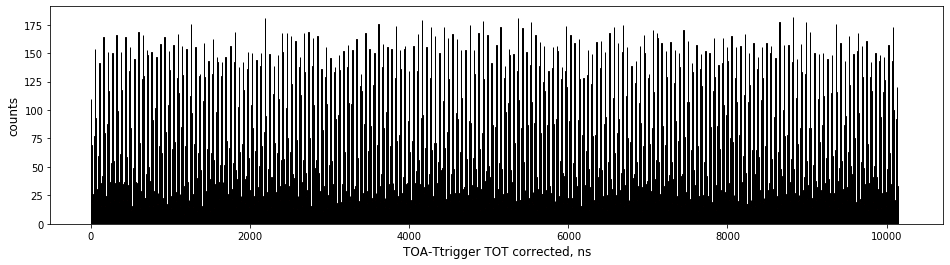

In [33]:
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
plt.hist(tof_corr2, bins = 2000, range = (0, 10200), color = 'r', ec = 'k')
plt.xlabel('TOA-Ttrigger TOT corrected, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

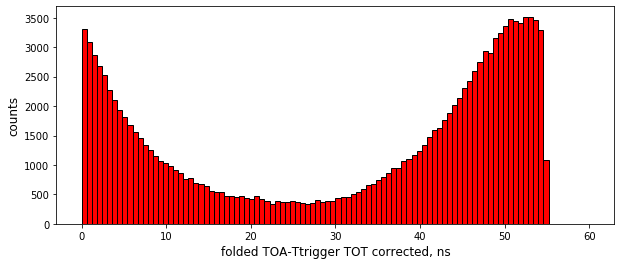

In [34]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(tfold2, bins = 100, range = (0, 60), color = 'r', ec = 'k')
plt.xlabel('folded TOA-Ttrigger TOT corrected, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

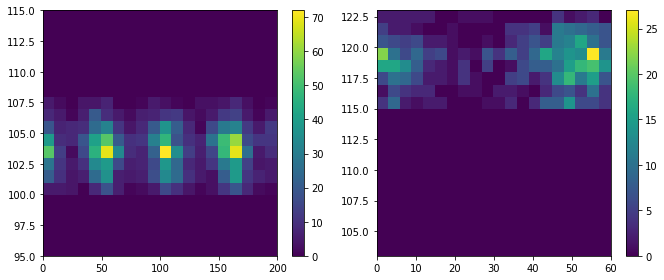

In [35]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(tof_corr2, y2, bins = 20, range = [(0, 200), (95, 115)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(tof_corr2, x2, bins = 20, range = [(0, 60), (103, 123)])
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


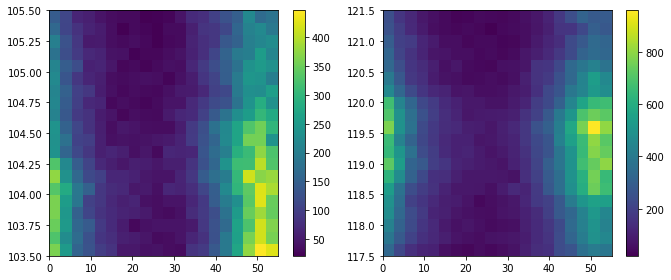

In [38]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(tfold2, y2, bins = 20, range = [(0, 55), (103.5, 105.5)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(tfold2, x2, bins = 20, range = [(0, 55), (117.5, 121.5)])
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

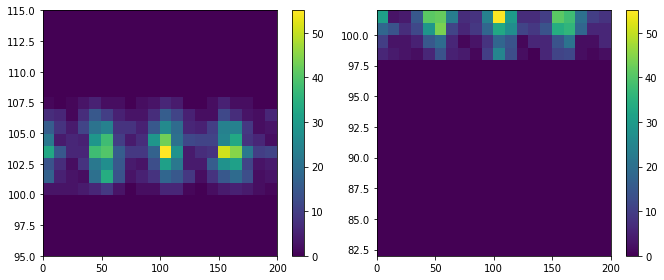

In [39]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(tof_corr1, y1, bins = 20, range = [(0, 200), (95, 115)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(tof_corr1, x1, bins = 20, range = [(0, 200), (82, 102)])
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()


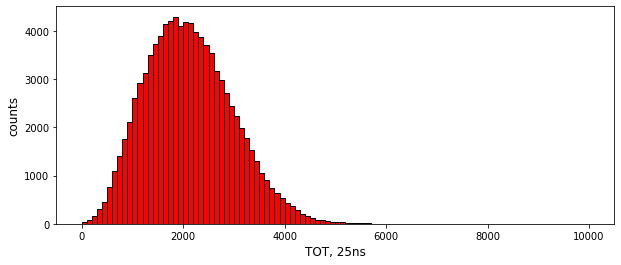

In [40]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(a1, bins = 100, range = (0, 10000), color = 'r', ec = 'k')
plt.xlabel('TOT, 25ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

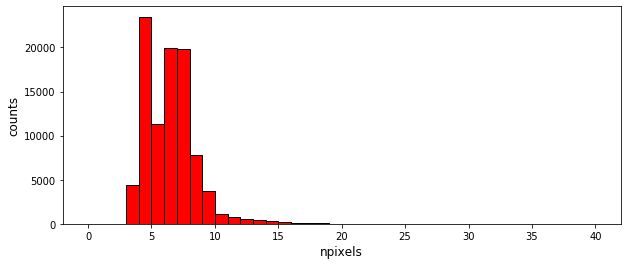

In [41]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(n1, bins = 40, range = (0,40), color = 'r', ec = 'k')
plt.xlabel('npixels',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

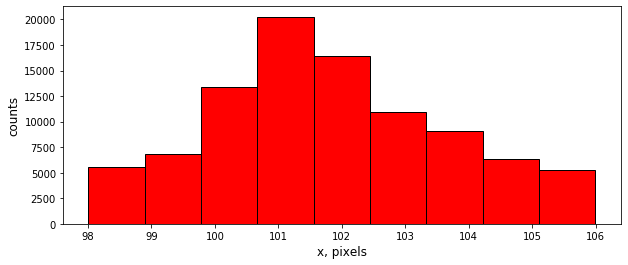

In [42]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(x1, bins = 9, color = 'r', ec = 'k')
plt.xlabel('x, pixels',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

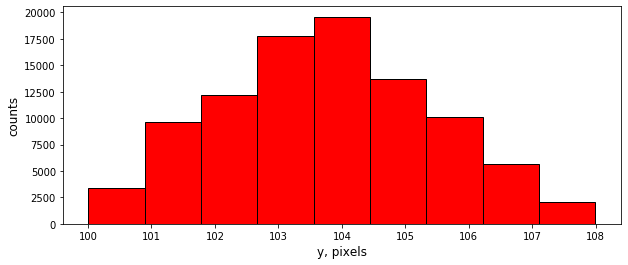

In [43]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(y1, bins = 9, color = 'r', ec = 'k')
plt.xlabel('y, pixels',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()